# Метод полного перебора

A -> C -> B -> E -> D


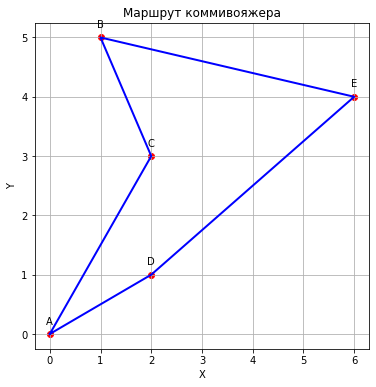

In [14]:
#методом полного перебора
import matplotlib.pyplot as plt
import itertools

def calculate_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

def plot_tsp_route(points, path):
    x = [point[0] for point in points]
    y = [point[1] for point in points]

    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, color='red', zorder=1)
    
    # создает два новых списка path_x и path_y, 
    #которые содержат координаты городов в порядке посещения, основываясь на исходном пути path.
    
    path_x = [x[i] for i in path]
    path_y = [y[i] for i in path]
    path_x.append(path_x[0])  # Добавить первый город в конец для завершения цикла
    path_y.append(path_y[0])  # Добавить первый город в конец для завершения цикла
    
    plt.plot(path_x, path_y, color='blue', linewidth=2, zorder=2)
    
    for i, point in enumerate(points):
        plt.annotate(chr(65 + i), (point[0], point[1]), textcoords="offset points", xytext=(0, 10), ha='center')
    
    plt.title('Маршрут коммивояжера')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()


def tsp_brute_force(points):
    num_points = len(points)
    best_path = None
    best_distance = float('inf')

    # Генерация всех возможных перестановок городов
    for permutation in itertools.permutations(range(num_points)):
        #Создается список path, содержащий порядок посещения городов для текущей перестановки.
        path = list(permutation)
        path.append(path[0])  # Возврат к исходному городу

        # Вычисление длины пути для текущей перестановки
        distance = sum(calculate_distance(points[path[i]], points[path[i+1]]) for i in range(num_points))

        # Обновление лучшего маршрута, если найден более короткий путь
        if distance < best_distance:
            best_distance = distance
            best_path = path[:-1]  # Исключение возврата к исходному городу

    return best_path

# Пример использования
points = [(0, 0), (1, 5), (2, 3), (2, 1), (6, 4)]
path = tsp_brute_force(points)

symbol_path = [chr(65 + i) for i in path]
print(' -> '.join(symbol_path))

plot_tsp_route(points, path)

# Метод включения ближайшего города

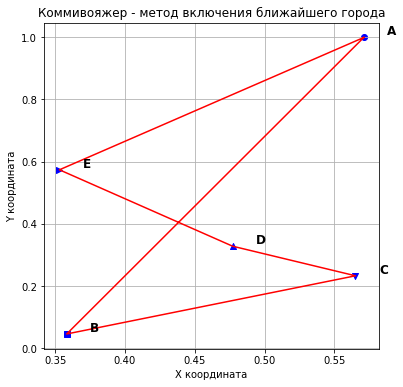

Ближайшие пути:
Город A -> Город E: 0.47829817333101965
Город E -> Город D: 0.27535876859566777
Город D -> Город C: 0.12957506625751214
Город C -> Город B: 0.27891192344681975


In [6]:
import math
import random
import matplotlib.pyplot as plt

def distance(city1, city2):
    """Вычисляет расстояние между двумя городами."""
    x1, y1 = city1
    x2, y2 = city2
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def nearest_neighbor(cities):
    """Решает задачу коммивояжера методом включения ближайшего города."""
    n = len(cities)
    #Создается множество remaining_cities, содержащее индексы оставшихся городов.
    remaining_cities = set(range(1, n))  # Индексы оставшихся городов
    tour = [0]  # Начинаем с города 0
    while remaining_cities:
        #Получаем индекс последнего посещенного города current_city из tour.
        current_city = tour[-1]
        #Инициализируем переменные nearest_city и min_distance.
        nearest_city = None
        min_distance = float('inf')
        
        #Проходимся по каждому городу city из remaining_cities:
        for city in remaining_cities:
            #Вычисляем расстояние dist между текущим городом current_city и городом 
            #city с помощью функции distance()
            dist = distance(cities[current_city], cities[city])
            if dist < min_distance:
                min_distance = dist
                nearest_city = city
        tour.append(nearest_city)
        remaining_cities.remove(nearest_city)
        #Возвращаем список tour, который содержит порядок посещения городов
    return tour, calculate_path_length(tour, cities)

def calculate_path_length(tour, cities):
    """Вычисляет длину пути по заданному порядку городов."""
    path_length = 0
    for i in range(len(tour) - 1):
        city1 = cities[tour[i]]
        city2 = cities[tour[i+1]]
        path_length += distance(city1, city2)
    return path_length

# Сгенерируем случайные города для примера
random.seed()
num_cities = 5
cities = [(random.random(), random.random()) for _ in range(num_cities)]  # Координаты городов

# Решим задачу коммивояжера
best_tour = None
best_path_length = float('inf')
for _ in range(5):
    tour, path_length = nearest_neighbor(cities)
    if path_length < best_path_length:
        best_tour = tour
        best_path_length = path_length

# Построим график
# Создание списка символов для обозначения городов
city_symbols = ['A', 'B', 'C', 'D', 'E']

# Построим график
x = [city[0] for city in cities]
y = [city[1] for city in cities]

plt.figure(figsize=(6, 6))
plt.plot([x[i] for i in best_tour + [best_tour[0]]], [y[i] for i in best_tour + [best_tour[0]]], 'r-')
markers = ['o', 's', 'v', '^', '>', 'x', 'D', '*', 'P', 'h']  # Символы для обозначения городов на графике
for i, (xc, yc) in enumerate(zip(x, y)):
    plt.scatter(xc, yc, marker=markers[i % len(markers)], color='blue')
    plt.text(xc + 0.02, yc + 0.02, city_symbols[i], ha='center', va='center', fontweight='bold', fontsize=12)

plt.xlabel('X координата')
plt.ylabel('Y координата')
plt.title('Коммивояжер - метод включения ближайшего города')
plt.grid(True)
plt.show()

# Вывод ближайших путей
print("Ближайшие пути:")
for i in range(len(best_tour) - 1):
    k = 0
    city1 = best_tour[i]
    city2 = best_tour[i + 1]
    path_dist = distance(cities[city1], cities[city2])
    
    print(f"Город {city_symbols[city1]} -> Город {city_symbols[city2]}: {path_dist}")
    
    


